In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff


In [2]:
train = pd.read_csv('./DataTwitterSen/train.csv')
test = pd.read_csv('./DataTwitterSen/test.csv')
ss = pd.read_csv('./DataTwitterSen/sample_submission.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


In [4]:
train.dropna(inplace=True)

In [5]:
train.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [6]:
train.describe()

,textID,text,selected_text,sentiment
count,27480,27480,27480,27480
unique,27480,27480,22463,3
top,cb774db0d1,"I`d have responded, if I were going",good,neutral
freq,1,1,199,11117


In [7]:
temp = train.groupby('sentiment').count()['text'].reset_index().sort_values(by='text', ascending=False)

print(temp)

  sentiment   text
1   neutral  11117
2  positive   8582
0  negative   7781


C:\Users\hp\AppData\Local\Temp\ipykernel_21720\2525969125.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x='sentiment', palette='viridis')


<Axes: xlabel='sentiment', ylabel='count'>

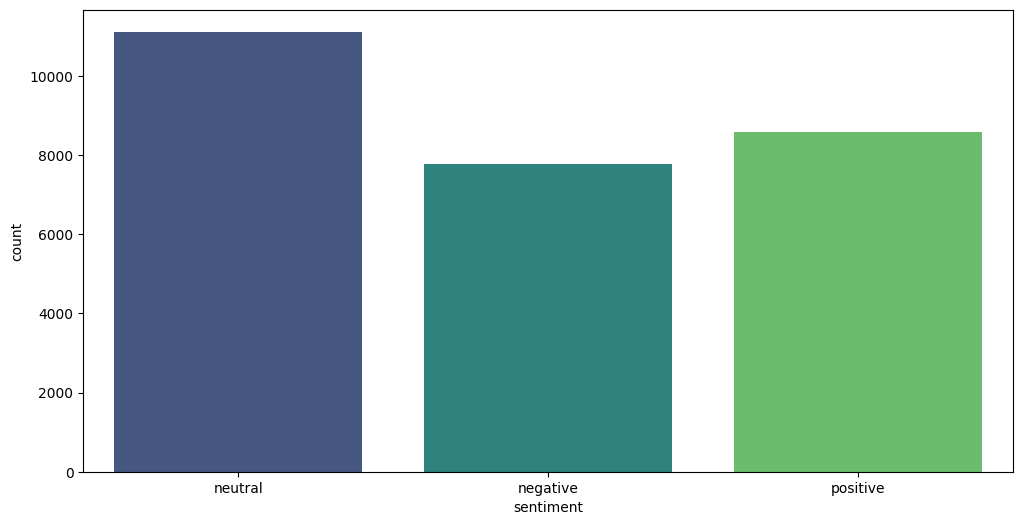

In [8]:
plt.figure(figsize=(12, 6))
sns.countplot(data=train, x='sentiment', palette='viridis')

In [9]:
fig = go.Figure(go.Funnelarea(
    text = temp.sentiment, values = temp.text,
    title = "Sentiment Distribution"))
fig.show()

In [10]:
def jaccard (str1, str2):
    a = set(str1.lower().split())
    b = set(str2.lower().split())
    c = len(a.intersection(b))
    d = len(a.union(b))
    return c / d if d != 0 else 0

In [11]:
results_jaccard = []
for ind, row in train.iterrows():
    sentence1 = row.text
    sentence2 = row.selected_text
    
    jaccard_score = jaccard(sentence1, sentence2)
    results_jaccard.append([sentence1, sentence2, jaccard_score])

In [12]:
jaccard = pd.DataFrame(results_jaccard, columns=['text', 'selected_text', 'jaccard_score'])
jaccard.head()

,text,selected_text,jaccard_score
0,"I`d have responded, if I were going","I`d have responded, if I were going",1.000000
1,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,0.200000
2,my boss is bullying me...,bullying me,0.166667
3,what interview! leave me alone,leave me alone,0.600000
4,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",0.214286


In [13]:
train['number_of_words_in_ST'] = train['selected_text'].apply(lambda x: len(x.split()))
train['number_of_words_in_T'] = train['text'].apply(lambda x: len(x.split()))
train['difference_in_words'] = train['number_of_words_in_T'] - train['number_of_words_in_ST']
train.head()

,textID,text,selected_text,sentiment,number_of_words_in_ST,number_of_words_in_T,difference_in_words
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,7,7,0
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,2,10,8
2,088c60f138,my boss is bullying me...,bullying me,negative,2,5,3
3,9642c003ef,what interview! leave me alone,leave me alone,negative,3,5,2
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,3,14,11


In [18]:
hist_data = [train['number_of_words_in_ST'], train['number_of_words_in_T']]
group_labels = ['Number of Words in Selected Text', 'Number of Words in Text']

fig = ff.create_distplot(hist_data, group_labels, show_curve=False)
fig.update_layout(title_text='Distribution of Word Counts')
fig.update_layout(
                  autosize=False,
                  width=800,
                  height=500,
                  paper_bgcolor='LightSteelBlue',
                  )
fig.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_21720\3038241133.py:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\hp\AppData\Local\Temp\ipykernel_21720\3038241133.py:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




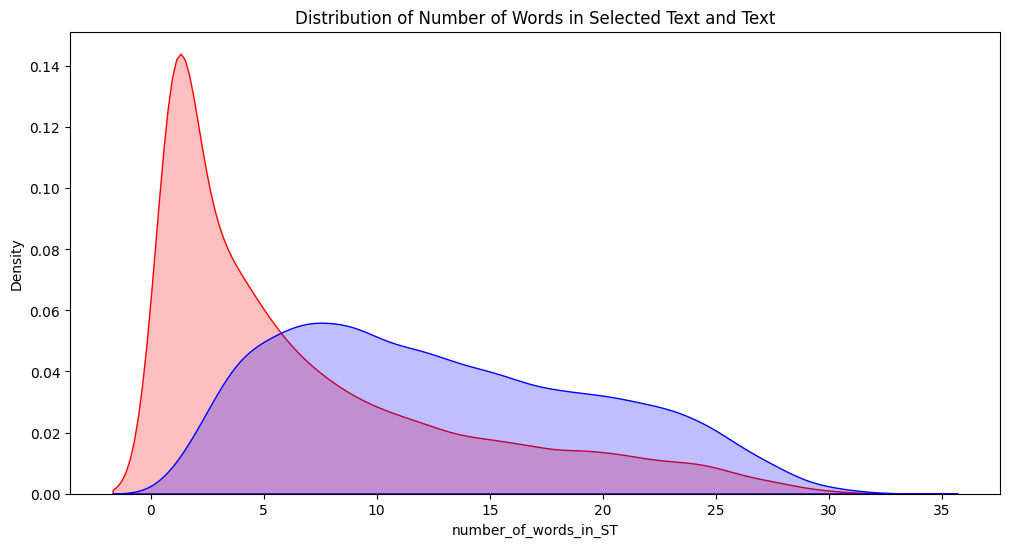

In [28]:
plt.figure(figsize=(12, 6))
p1 = sns.kdeplot(train['number_of_words_in_ST'], color='r', shade = True).set_title('Distribution of Number of Words in Selected Text and Text')
p1 = sns.kdeplot(train['number_of_words_in_T'], color='b', shade = True)

C:\Users\hp\AppData\Local\Temp\ipykernel_21720\265042258.py:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\hp\AppData\Local\Temp\ipykernel_21720\265042258.py:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




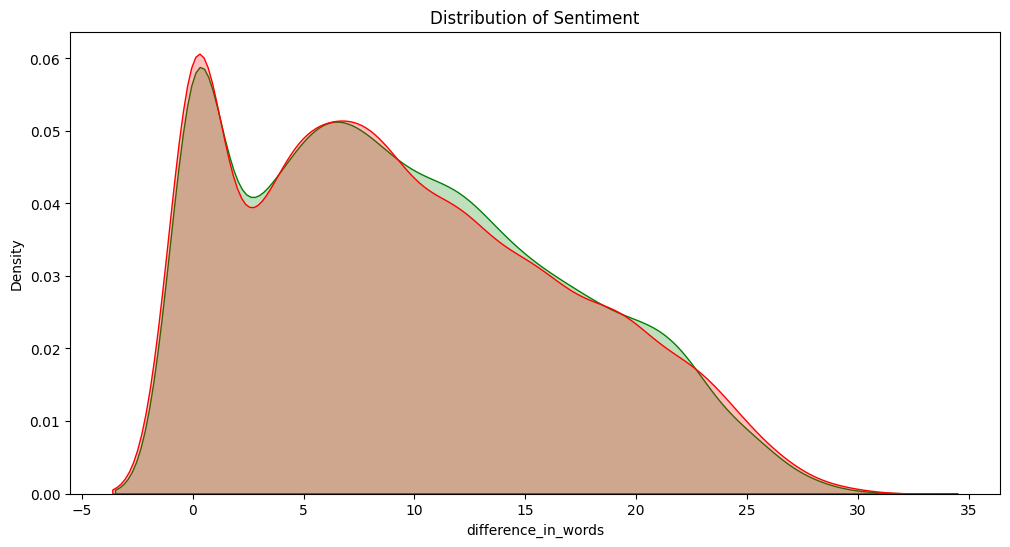

In [31]:
plt.figure(figsize=(12, 6))
p1 = sns.kdeplot(train[train['sentiment']=='positive']['difference_in_words'], shade=True, color='g').set_title('Distribution of Sentiment')
p2 = sns.kdeplot(train[train['sentiment']=='negative']['difference_in_words'], shade=True, color='r')

C:\Users\hp\AppData\Local\Temp\ipykernel_21720\3910237604.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0.5, 1.0, 'Distribution of Neutral Sentiment')

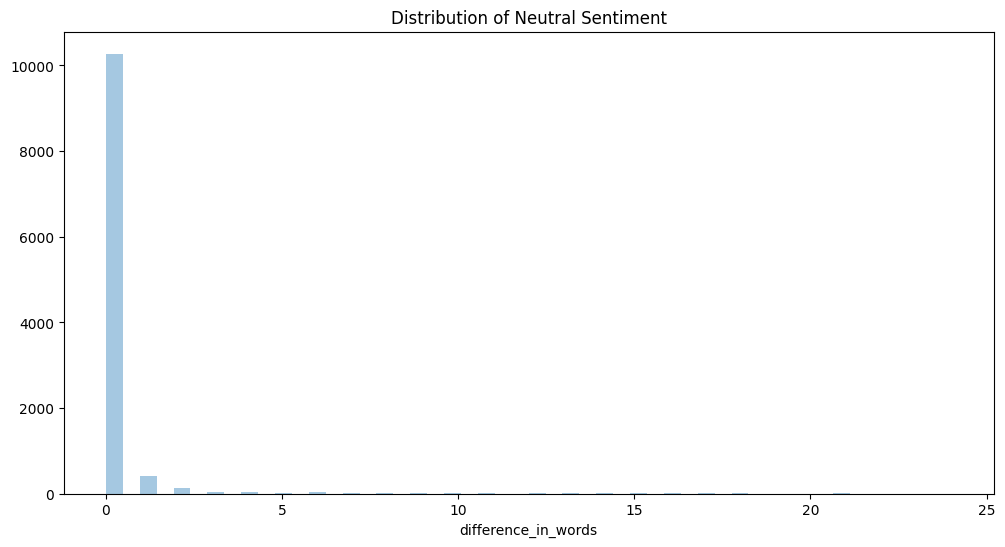

In [33]:
plt.figure(figsize=(12, 6))
sns.distplot(train[train['sentiment']=='neutral']['difference_in_words'], kde=False).set_title('Distribution of Neutral Sentiment')

C:\Users\hp\AppData\Local\Temp\ipykernel_21720\4012420439.py:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\hp\AppData\Local\Temp\ipykernel_21720\4012420439.py:4: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




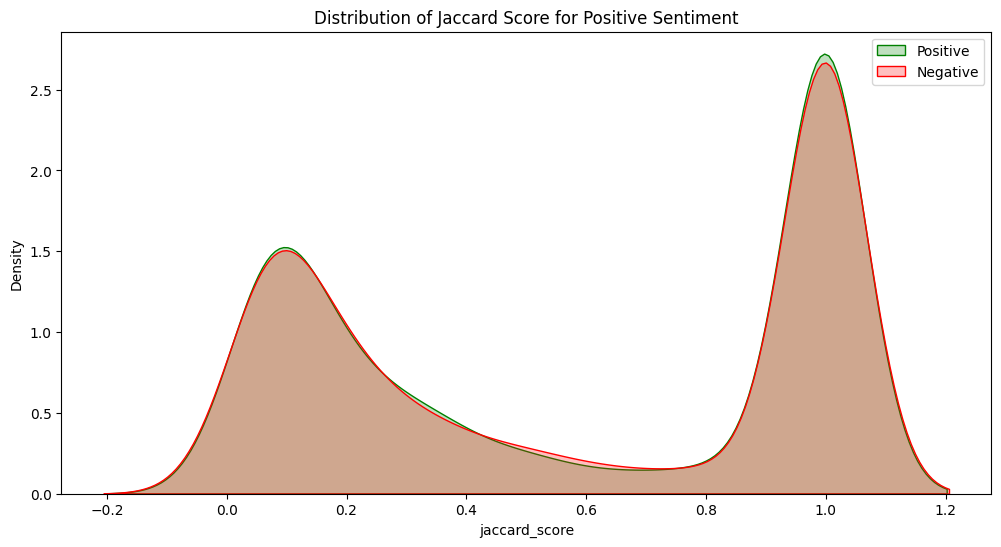

In [40]:
plt.figure(figsize=(12, 6))
train['jaccard_score'] = jaccard['jaccard_score']
p1 = sns.kdeplot(train[train['sentiment']=='positive']['jaccard_score'], shade=True, color='g').set_title('Distribution of Jaccard Score for Positive Sentiment')
p2 = sns.kdeplot(train[train['sentiment']=='negative']['jaccard_score'], shade=True, color='r')
plt.legend(['Positive', 'Negative'])

<Figure size 1200x600 with 0 Axes>

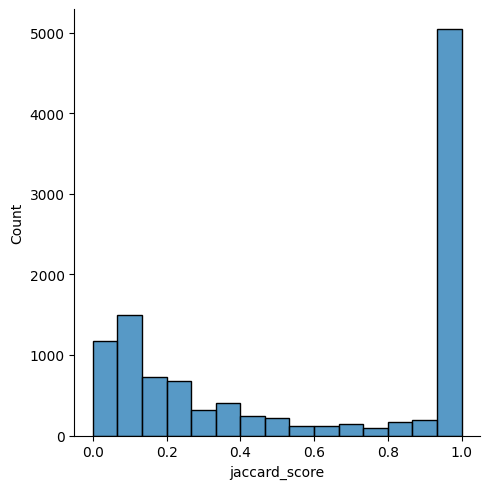

In [42]:
plt.figure(figsize=(12, 6))
sns.displot(train[train['sentiment']=='neutral']['jaccard_score'], kde=False)

In [51]:
k = train[train['number_of_words_in_T']<=2]
k.groupby('sentiment').mean()['jaccard_score']

TypeError: agg function failed [how->mean,dtype->object]